<a href="https://colab.research.google.com/github/saqibkhan2114/NLP-Analysis-Of-Rotten-Tomatoes-Critic-Reviews/blob/main/NLP_Analysis_of_Rotten_Tomatoes_Critic_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pandas Library Import**

In [1]:
import pandas as pd

# **Dataset Loading and Preview**

In [2]:
path= "/content/drive/MyDrive/Dataset/rotten_tomatoes_critic_reviews.csv"
df=pd.read_csv(path)
df.head(5)

rotten_tomatoes_link      critic_name  top_critic           publisher_name  \
0            m/0814255  Andrew L. Urban       False           Urban Cinefile   
1            m/0814255    Louise Keller       False           Urban Cinefile   
2            m/0814255              NaN       False      FILMINK (Australia)   
3            m/0814255     Ben McEachen       False  Sunday Mail (Australia)   
4            m/0814255      Ethan Alter        True       Hollywood Reporter   

  review_type review_score review_date  \
0       Fresh          NaN  2010-02-06   
1       Fresh          NaN  2010-02-06   
2       Fresh          NaN  2010-02-09   
3       Fresh        3.5/5  2010-02-09   
4      Rotten          NaN  2010-02-10   

                                      review_content  
0  A fantasy adventure that fuses Greek mythology...  
1  Uma Thurman as Medusa, the gorgon with a coiff...  
2  With a top-notch cast and dazzling special eff...  
3  Whether audiences will get behind The Lightnin...  
4  What's really lacking in The Lightning Thief i...

# **Importing Necessary Liabraries**



In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True


# **Text Cleaning and Preprocessing**

In [12]:

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return an empty string for non-string values
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    words = [word for word in text.split() if word not in stopwords_set]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the clean_text function to the 'review_content' column
df['cleaned_text'] = df['review_content'].apply(clean_text)

# Display the first few rows to verify the output
df[['review_content', 'cleaned_text']].head()


review_content  \
0  A fantasy adventure that fuses Greek mythology...   
1  Uma Thurman as Medusa, the gorgon with a coiff...   
2  With a top-notch cast and dazzling special eff...   
3  Whether audiences will get behind The Lightnin...   
4  What's really lacking in The Lightning Thief i...   

                                        cleaned_text  
0  fantasy adventure fuse greek mythology contemp...  
1  uma thurman medusa gorgon coiffure writhing sn...  
2  top notch cast dazzling special effect tide te...  
3  whether audience get behind lightning thief ha...  
4  really lacking lightning thief genuine sense w...

# **Word2Vec Model Training**

In [13]:
from gensim.models import Word2Vec

tokenized_text = df['cleaned_text'].apply(lambda x: x.split())

w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=5, workers=4)

w2v_model.wv['good']


array([-0.29384655, -1.4247078 , -1.7178096 , -1.0189108 ,  1.4543319 ,
        0.3501105 ,  1.3105665 , -1.3706647 ,  1.8741782 , -0.14609511,
        1.682193  , -1.8737863 ,  2.787822  , -1.0044832 ,  1.6097853 ,
       -0.43690214, -0.36074603, -2.172032  , -1.0631787 ,  1.0333068 ,
        1.0115241 ,  0.88314867, -1.2126848 ,  2.7456431 , -0.6283263 ,
        2.3340402 , -0.5251126 , -0.884508  ,  2.2352884 , -0.7346278 ,
        1.9238143 ,  0.6257261 ,  2.40169   ,  0.66769284, -2.3085234 ,
        2.1457028 , -0.31635183,  2.2131693 ,  1.4817747 , -0.7220039 ,
       -0.7670492 ,  1.0777075 ,  1.9979764 ,  0.09989832, -0.7589937 ,
       -0.14401554, -0.8693336 ,  1.1899437 ,  0.29544216, -1.3857155 ,
       -0.3097494 ,  1.0981126 , -0.74233854,  0.14827636, -0.05934135,
       -0.32132095,  0.19159141,  1.2703433 ,  0.737314  , -1.838656  ,
       -0.2368535 , -2.3283741 ,  1.1449897 , -0.15123285, -0.24444677,
       -1.4263234 , -2.2042375 ,  0.83909696,  2.8540623 , -0.73

# **Bag of Words Model Creation**

In [15]:
count_vectorizer = CountVectorizer(max_features=1000)
bow = count_vectorizer.fit_transform(df['cleaned_text']).toarray()

bow.shape

(1130017, 1000)

# **Part-of-Speech Tagging**

In [16]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sample_text = df['cleaned_text'].iloc[0]

tokens = nltk.word_tokenize(sample_text)

pos_tags = nltk.pos_tag(tokens)

pos_tags


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('fantasy', 'JJ'),
 ('adventure', 'NN'),
 ('fuse', 'NN'),
 ('greek', 'JJ'),
 ('mythology', 'NN'),
 ('contemporary', 'JJ'),
 ('american', 'JJ'),
 ('place', 'NN'),
 ('value', 'NN'),
 ('anyone', 'NN'),
 ('around', 'IN'),
 ('give', 'JJ'),
 ('take', 'NN'),
 ('couple', 'NN'),
 ('year', 'NN'),
 ('thrill', 'NN'),
 ('visual', 'JJ'),
 ('spectacle', 'NN')]

# **Sentiment Analysis**

In [17]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

df[['cleaned_text', 'sentiment']].head()


cleaned_text  sentiment
0  fantasy adventure fuse greek mythology contemp...   0.041667
1  uma thurman medusa gorgon coiffure writhing sn...   0.700000
2  top notch cast dazzling special effect tide te...   0.321429
3  whether audience get behind lightning thief ha...   0.068087
4  really lacking lightning thief genuine sense w...   0.200000

# **Sentiment Classification**

In [18]:

def get_sentiment_label(score):
    if score >= 0.3:
        return 'Positive'
    elif score >= 0.15 and score < 0.3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment_label'] = df['sentiment'].apply(get_sentiment_label)

df[['sentiment', 'sentiment_label']].head()


sentiment sentiment_label
0   0.041667        Negative
1   0.700000        Positive
2   0.321429        Positive
3   0.068087        Negative
4   0.200000         Neutral

# **Sentiment Distribution Visualization**

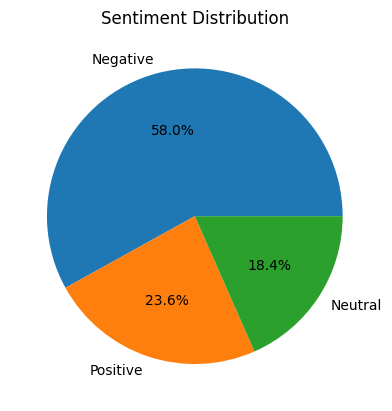

In [19]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_label'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()



# **spaCy Installation and Model Download**

In [20]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Named Entity Recognition (NER)**

In [21]:
import spacy

nlp = spacy.load("en_core_web_sm")

def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

sample_data = df.head(10)
sample_data['entities'] = sample_data['cleaned_text'].apply(perform_ner)

sample_data[['cleaned_text', 'entities']].head()


<ipython-input-21-4a250227b874>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['entities'] = sample_data['cleaned_text'].apply(perform_ner)


cleaned_text  \
0  fantasy adventure fuse greek mythology contemp...   
1  uma thurman medusa gorgon coiffure writhing sn...   
2  top notch cast dazzling special effect tide te...   
3  whether audience get behind lightning thief ha...   
4  really lacking lightning thief genuine sense w...   

                                            entities  
0  [(greek, NORP), (american, NORP), (couple year...  
1  [(thurman medusa gorgon, PERSON), (one, CARDIN...  
2                                                 []  
3                                                 []  
4                                                 []